In [1]:
import tensorflow as tf
import tensorflow_addons as tfa
# from tensorflow.python.compiler.mlcompute import mlcompute
# mlcompute.set_mlc_device(device_name='gpu')
#
# from tensorflow.python.framework.ops import disable_eager_execution
# disable_eager_execution()

import pathlib
from IPython import display
import functools
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import time
from tqdm import tqdm
# from mitdeeplearning import as mdl
import cv2 as cv
import funcs as ff
import os
from VAE import VAE
from datetime import datetime

# check that the environment is fine
print('TensorFlow version : ', tf.__version__ )
print('NumPy version : ', np.__version__ )
print('OpenCV version', cv.__version__)


/opt/homebrew/Caskroom/miniforge/base/envs/tf-arm/lib/python3.8/site-packages/tensorflow_addons/utils/ensure_tf_install.py:54: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.2.0 and strictly below 2.4.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.4.0-rc0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


TensorFlow version :  2.4.0-rc0
NumPy version :  1.20.1
OpenCV version 4.5.1


In [2]:
'''
DIRECTORY SETTINGS
'''
cwd = '/Volumes/Seagate Backup Plus Drive/EXPERIMENTS' #os.getcwd()

serie_dir = os.path.join(cwd, 'Embeddings')
if not os.path.isdir(serie_dir):
    os.makedirs(serie_dir)

exp_dir = os.path.join(serie_dir, 'Xception-vae-no_classification')
if not os.path.isdir(exp_dir):
    os.makedirs(exp_dir)

now = datetime.now().strftime('%b%d-%Y')
print(now)
date_dir = os.path.join(exp_dir, now)
if not os.path.isdir(date_dir):
    os.makedirs(date_dir)

last_ckpt = os.path.join(exp_dir, 'last_ckpt')
if not os.path.isdir(last_ckpt):
  os.mkdir(last_ckpt)

print('cwd : ', cwd)
print('serie dir : ', serie_dir)
print('exp_dir : ', exp_dir)
print('date_ dir : ', date_dir)
print('last ckpt dir : ', last_ckpt)


Apr12-2021
cwd :  /Volumes/Seagate Backup Plus Drive/EXPERIMENTS
serie dir :  /Volumes/Seagate Backup Plus Drive/EXPERIMENTS/Embeddings
exp_dir :  /Volumes/Seagate Backup Plus Drive/EXPERIMENTS/Embeddings/Xception-vae-no_classification
date_ dir :  /Volumes/Seagate Backup Plus Drive/EXPERIMENTS/Embeddings/Xception-vae-no_classification/Apr12-2021
last ckpt dir :  /Volumes/Seagate Backup Plus Drive/EXPERIMENTS/Embeddings/Xception-vae-no_classification/last_ckpt


In [3]:
def record_parser(example):
    example_fmt = {
        'label': tf.io.FixedLenFeature([14], tf.float32),
        'image': tf.io.FixedLenFeature([],tf.string, default_value='')}
    parsed = tf.io.parse_single_example(example, example_fmt)
    image = tf.io.decode_png(parsed["image"],channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    return image, parsed['label']

def normalize_image(img,labels):
    imagenet_mean = np.array([0.485, 0.456, 0.406])
    imagenet_std = np.array([0.229, 0.224, 0.225])
    img = (img - imagenet_mean) / imagenet_std
    return img,labels

def make_dataset(filename):
    base_path = '/Volumes/Seagate Backup Plus Drive/datasets/chexpert-tfrecords'
    full_path = os.path.join(base_path,filename)
    dataset = tf.data.TFRecordDataset(full_path)
    parsed_dataset = dataset.map(record_parser,num_parallel_calls = tf.data.experimental.AUTOTUNE)
    parsed_dataset = parsed_dataset.map(normalize_image,num_parallel_calls = tf.data.experimental.AUTOTUNE)
    return parsed_dataset

batch_size = 16
#train_dataset = make_dataset('training_cropped.tfrecords').shuffle(buffer_size=128).batch(batch_size, drop_remainder=True).prefetch(1)
#val_dataset = make_dataset('validation_cropped.tfrecords').shuffle(buffer_size=128).batch(batch_size, drop_remainder=True).prefetch(1)
#train_dataset = make_dataset('training_cropped.tfrecords').batch(batch_size, drop_remainder=True).prefetch(1)
train_ds = make_dataset('new_training_cropped.tfrecords').shuffle(buffer_size=128).batch(batch_size, drop_remainder=True).prefetch(1)

val_ds = make_dataset('validation_cropped.tfrecords').batch(batch_size, drop_remainder=True).prefetch(1)

test_ds = make_dataset('test_set_cropped.tfrecords').batch(batch_size, drop_remainder=False).prefetch(1)

label_names = ['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
                'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']
'''
train_data = 0
for x, y, in train_ds:
    train_data += 1

val_data = 0
for x, y, in val_ds:
    val_data += 1

test_data = 0
for x, y, in test_ds:
    test_data += 1

print('train data : {}'
      '\nvalid data : {}'
      '\ntest data : {}'.format(train_data, val_data, test_data))
'''

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


"\ntrain_data = 0\nfor x, y, in train_ds:\n    train_data += 1\n\nval_data = 0\nfor x, y, in val_ds:\n    val_data += 1\n\ntest_data = 0\nfor x, y, in test_ds:\n    test_data += 1\n\nprint('train data : {}'\n      '\nvalid data : {}'\n      '\ntest data : {}'.format(train_data, val_data, test_data))\n"

image shape : (224, 224, 3)
image max value : [0.91756374 0.95538294 1.        ]
image min value : [0.         0.01733788 0.06612407]
labels :  tf.Tensor([0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.], shape=(14,), dtype=float32)


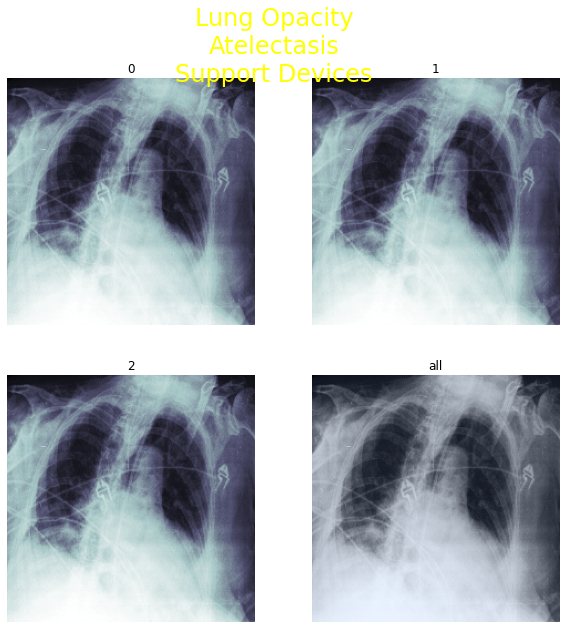

In [4]:
def normalize_tensor(tensor : tf.Tensor):
    max = tf.reduce_max(tensor)
    min = tf.reduce_min(tensor)
    return (tensor - min) / (max - min)

train_ds.shuffle(1000)

fig = plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    '''
    for i in range(4):
        img = normalize_tensor(images[i])
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(img[..., 1].numpy().astype("float"))
        # title_obj = plt.title(class_names[labels[i]])
        # plt.setp(title_obj, color='y')
        plt.axis("off")
        print('image shape : {}'.format(img.shape))
        print('image max value : {}'.format(tf.reduce_max(img, axis=(-2, -3))))
        print('image min value : {}'.format(tf.reduce_min(img, axis=(-2, -3))))
    '''
    string = None
    for i in range(labels[1].shape[0]):
        if labels[1][i] == 1 and string is not None:
            string += '\n' + label_names[i]
        elif labels[1][i] == 1 and string is None:
            string = label_names[i]

    # fig.suptitle(label_names[tf.argmax(labels[1])], fontsize=24, color='yellow')
    fig.suptitle(string, fontsize=24, color='yellow')
    img = normalize_tensor(images[1])
    ax1 = plt.subplot(2, 2, 1)
    plt.imshow(img[..., 0].numpy().astype("float"), cmap='bone')
    plt.axis("off")
    plt.title('0')

    ax2 = plt.subplot(2, 2, 2)
    plt.imshow(img[..., 1].numpy().astype("float"), cmap='bone')
    plt.axis("off")
    plt.title('1')

    ax3 = plt.subplot(2, 2, 3)
    plt.imshow(img[..., 2].numpy().astype("float"), cmap='bone')
    plt.axis("off")
    plt.title('2')

    ax4 = plt.subplot(2, 2, 4)
    plt.imshow(img.numpy().astype("float"))
    plt.axis("off")
    plt.title('all')
    print('image shape : {}'.format(img.shape))
    print('image max value : {}'.format(tf.reduce_max(img, axis=(-2, -3))))
    print('image min value : {}'.format(tf.reduce_min(img, axis=(-2, -3))))
    print('labels : ', labels[1])
    # print('original label : ', labels[i])
    # print('image shape : ', images[i].shape)


In [5]:
# ###############
# Model
# ###############
model = tf.keras.applications.Xception(
    include_top=False, weights='imagenet', pooling='avg'
)
vae = VAE(dummy_model=False, latent_dim=100, number_of_classes=0)
vae.load_encoder(model=model, keep_last_layer=True)
vae.load_decoder(model=ff.make_std_decoder(conv_steps=5, final_images_size=(224,224)))
vae.encoder.load_weights(os.path.join(last_ckpt, 'encoder-last'))
vae.decoder.load_weights(os.path.join(last_ckpt, 'decoder-last'))
vae.summary()

self.latent_dim : 100
self.num_classes : 0
self.bottleneck : 200
decoder initial dim :  7
Encoder : 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 2048)              20861480  
_________________________________________________________________
dense (Dense)                (None, 200)               409800    
Total params: 21,271,280
Trainable params: 21,216,752
Non-trainable params: 54,528
_________________________________________________________________
Decoder : 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (1, 25088)                2533888   
_________________________________________________________________
reshape (Reshape)            (1, 7, 7, 512)            0         
_____________________________________

In [6]:
'''
# ###############
# TRAINING LOOP FUNCTIONS
# ###############
'''
lr = 1e-4
epochs = 100
optimizer = tf.keras.optimizers.Adam(lr)

# Training step with gradient tapes
@tf.function
def vae_train_step(x, y, optimizer):

  with tf.GradientTape() as tape:
    # Feed input x into dbvae. Note that this is using the DB_VAE call function!
    z_mu, z_log_sigma, x_rec, y_hat = vae(x)
    loss = VAE.vae_loss_function(x, x_rec, z_mu, z_log_sigma)
    #classification_loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=y_hat, labels=y), axis=-1)
    #loss = vae_loss + classification_loss
  grads = tape.gradient(loss, vae.trainable_variables)
  # apply gradients to variables
  optimizer.apply_gradients(zip(grads, vae.trainable_variables))
  return loss, y_hat

In [7]:
train_ds_A = train_ds.shard(num_shards=5, index=0)
train_ds_B = train_ds.shard(num_shards=5, index=1)
train_ds_C = train_ds.shard(num_shards=5, index=2)
train_ds_D = train_ds.shard(num_shards=5, index=3)
train_ds_E = train_ds.shard(num_shards=5, index=4)
del train_ds

In [8]:
'''TRAINING LOOP'''


helper = ff.TrainingUtility(
    model_list=[vae.encoder, vae.decoder],
    model_names_list=['encoder', 'decoder']
)

for epoch in tqdm(range(epochs)):
    start_time = time.time()
    #train_ds = train_ds.shuffle(550)
    losses = tf.zeros([1], dtype=tf.float32)
    #train_hamming = tf.zeros([1], dtype=tf.float32)
    count = 0
    for train_x, train_labels in train_ds_A:
        count += 1
        train_loss, logits = vae_train_step(train_x, train_labels, optimizer)
        losses = tf.concat([losses, tf.expand_dims(tf.math.reduce_mean(train_loss), axis=0)], axis=0)
        preds = tf.cast(tf.nn.sigmoid(logits) > .5, dtype=tf.int32)
        train_labels = tf.cast(train_labels > .5, dtype=tf.int32)
        #train_hamming = tf.concat([train_hamming, tf.expand_dims(tfa.metrics.hamming_distance(preds, train_labels), axis=0)], axis=0)
        if not bool(count%50):
            count = 0
            helper.save_checkpoints(path=last_ckpt, suffix = '-last')
            print('saved ckpt')
    print('a finished')
    for train_x, train_labels in train_ds_B:
        count += 1
        train_loss, logits = vae_train_step(train_x, train_labels, optimizer)
        losses = tf.concat([losses, tf.expand_dims(tf.math.reduce_mean(train_loss), axis=0)], axis=0)
        preds = tf.cast(tf.nn.sigmoid(logits) > .5, dtype=tf.int32)
        train_labels = tf.cast(train_labels > .5, dtype=tf.int32)
        #train_hamming = tf.concat([train_hamming, tf.expand_dims(tfa.metrics.hamming_distance(preds, train_labels), axis=0)], axis=0)
        if not bool(count%50):
            count = 0
            helper.save_checkpoints(path=last_ckpt, suffix = '-last')
            print('saved ckpt')
    print('B finished')
    for train_x, train_labels in train_ds_C:
        count += 1
        train_loss, logits = vae_train_step(train_x, train_labels, optimizer)
        losses = tf.concat([losses, tf.expand_dims(tf.math.reduce_mean(train_loss), axis=0)], axis=0)
        preds = tf.cast(tf.nn.sigmoid(logits) > .5, dtype=tf.int32)
        train_labels = tf.cast(train_labels > .5, dtype=tf.int32)
        #train_hamming = tf.concat([train_hamming, tf.expand_dims(tfa.metrics.hamming_distance(preds, train_labels), axis=0)], axis=0)
        if not bool(count%50):
            count = 0
            helper.save_checkpoints(path=last_ckpt, suffix = '-last')
            print('saved ckpt')
    print('c finished')
    for train_x, train_labels in train_ds_D:
        count += 1
        train_loss, logits = vae_train_step(train_x, train_labels, optimizer)
        losses = tf.concat([losses, tf.expand_dims(tf.math.reduce_mean(train_loss), axis=0)], axis=0)
        preds = tf.cast(tf.nn.sigmoid(logits) > .5, dtype=tf.int32)
        train_labels = tf.cast(train_labels > .5, dtype=tf.int32)
        #train_hamming = tf.concat([train_hamming, tf.expand_dims(tfa.metrics.hamming_distance(preds, train_labels), axis=0)], axis=0)
        if not bool(count%50):
            count = 0
            helper.save_checkpoints(path=last_ckpt, suffix = '-last')
            print('saved ckpt')
    print('d finished')
    for train_x, train_labels in train_ds_E:
        count += 1
        train_loss, logits = vae_train_step(train_x, train_labels, optimizer)
        losses = tf.concat([losses, tf.expand_dims(tf.math.reduce_mean(train_loss), axis=0)], axis=0)
        preds = tf.cast(tf.nn.sigmoid(logits) > .5, dtype=tf.int32)
        train_labels = tf.cast(train_labels > .5, dtype=tf.int32)
        #train_hamming = tf.concat([train_hamming, tf.expand_dims(tfa.metrics.hamming_distance(preds, train_labels), axis=0)], axis=0)
        if not bool(count%50):
            count = 0
            helper.save_checkpoints(path=last_ckpt, suffix = '-last')
            print('saved ckpt')
    print('e finished')

    train_loss = tf.reduce_mean(losses[1:, ...])
    train_hamming = tf.reduce_mean(train_hamming[1:, ...])
    end_time = time.time()
    train_time = end_time - start_time

    start_time = time.time()
    losses = tf.zeros([1], dtype=tf.float32)
    #valid_hamming = tf.zeros([1], dtype=tf.float32)
    for test_x, test_labels in (val_ds):
        z_mean, z_logsigma, x_recon, y_logits = vae(test_x)
        vae_val_loss = (VAE.vae_loss_function(test_x, x_recon, z_mean, z_logsigma))
        class_val_loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=y_logits, labels=test_labels), axis=-1)
        losses = tf.concat([losses, tf.expand_dims(tf.reduce_mean(vae_val_loss + class_val_loss), axis=-1)], axis=0)
        preds = tf.cast(tf.nn.sigmoid(y_logits) > .5, dtype=tf.int32)
        test_labels = tf.cast(test_labels > .5, dtype=tf.int32)
        valid_hamming = tf.concat([valid_hamming, tf.expand_dims(tfa.metrics.hamming_distance(preds, test_labels), axis=-1)], axis=0)
    #valid_hamming = tf.reduce_mean(valid_hamming[1:, ...])
    valid_loss = tf.reduce_mean(losses[1:, ...])
    end_time = time.time()
    val_time = end_time - start_time

    helper.add_loss(train_value=train_loss, val_value=valid_loss)
    helper.plot_loss()
    helper.add_metric(train_value=train_hamming, val_value=valid_hamming)
    #helper.plot_metric(ylabel='Hamming Distance')
    #helper.plot_imgs(imgs=x_recon[:4], imgs2=test_x[:4])
    helper.show_plots()
    helper.earlystopping_loss()
    helper.earlystopping_overfitting()
    helper.save_checkpoints(path=date_dir)
    # helper.save_checkpoints(path=ckpt, suffix = '-last')
    print('Epoch: {}'
          '\nTraining set Loss : {}'
          '\nValidation set Loss: {}'
          '\ntime elapse for current epoch: training {} validation {}'
        .format(epoch, train_loss, valid_loss, train_time, val_time))
    #print('Hamming distance : \n\t Training : {}\nValidation : {}'.format(train_hamming, valid_hamming))

# vae.save_models()

  0%|          | 0/100 [29:32<?, ?it/s]


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
saved ckpt
saved ckpt
saved ckpt
saved ckpt


KeyboardInterrupt: 

In [ ]:
helper.save_checkpoints(path=last_ckpt, suffix = '-last')